In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
def load_data(filename):
  return pd.read_csv(filename, sep=';')

df_2022 = load_data('../files/PEDE2022.csv')
df_2023 = load_data('../files/PEDE2023.csv')
df_2024 = load_data('../files/PEDE2024.csv')

print(f"Linhas 2022: {df_2022.shape[0]}")
print(f"Linhas 2023: {df_2023.shape[0]}")
print(f"Linhas 2024: {df_2024.shape[0]}")

Linhas 2022: 860
Linhas 2023: 1014
Linhas 2024: 1156


In [5]:
# Dicionário de padronização para 2022
rename_2022 = {
    'INDE 22': 'INDE',
    'Pedra 22': 'Pedra',
    'Matem': 'Mat',
    'Portug': 'Por',
    'Inglês': 'Ing',
    'Defas': 'Defasagem',
    'Idade 22': 'Idade'
}

# Dicionário de padronização para 2023
rename_2023 = {
    'INDE 2023': 'INDE',
    'Pedra 2023': 'Pedra'
}

# Dicionário de padronização para 2024
rename_2024 = {
    'INDE 2024': 'INDE',
    'Pedra 2024': 'Pedra'
}

# Aplicando a renomeação
df_2022 = df_2022.rename(columns=rename_2022)
df_2023 = df_2023.rename(columns=rename_2023)
df_2024 = df_2024.rename(columns=rename_2024)

# Adicionando coluna de Ano para rastreabilidade
df_2022['Ano_Base'] = 2022
df_2023['Ano_Base'] = 2023
df_2024['Ano_Base'] = 2024

In [6]:
# Colunas de interesse para análise de correlação (Indicadores e Notas)
target_cols = [
    'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN',
    'Mat', 'Por', 'Ing', 'Defasagem', 'Pedra', 'Ano_Base'
]

# Filtrar datasets para ter apenas colunas existentes no target_cols
# (Isso evita erro se alguma coluna faltar em um ano específico)
df_all = pd.concat([
    df_2022[ [c for c in target_cols if c in df_2022.columns] ],
    df_2023[ [c for c in target_cols if c in df_2023.columns] ],
    df_2024[ [c for c in target_cols if c in df_2024.columns] ]
], ignore_index=True)

print("Shape do Dataset Unificado:", df_all.shape)
df_all.head()

Shape do Dataset Unificado: (3030, 13)


,INDE,IAA,IEG,IPS,IDA,IPV,IAN,Mat,Por,Ing,Defasagem,Pedra,Ano_Base
0,"5,783","8,3","4,1","5,6","4,0","7,278","5,000","2,7","3,5","6,0",-1,Quartzo,2022
1,"7,055","8,8","5,2","6,3","6,8","6,778","10,000","6,3","4,5","9,7",0,Ametista,2022
2,"6,591","0,0","7,9","5,6","5,6","7,556","10,000","5,8","4,0","6,9",0,Ágata,2022
3,"5,951","8,8","4,5","5,6","5,0","5,278","10,000","2,8","3,5","8,7",0,Quartzo,2022
4,"7,427","7,9","8,6","5,6","5,2","7,389","10,000","7,0","2,9","5,7",0,Ametista,2022


In [7]:
# Colunas numéricas para conversão
numeric_cols = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'Mat', 'Por', 'Ing']

for col in numeric_cols:
    if col in df_all.columns:
        df_all[col] = pd.to_numeric(
                    df_all[col].astype(str).str.replace(',', '.'),
                    errors='coerce'
                )

# Converter Defasagem para numérico (pode haver sujeira)
df_all['Defasagem'] = pd.to_numeric(df_all['Defasagem'], errors='coerce')

# Tratamento da coluna Pedra (Transformar em Ordinal para correlação)
# Quartzo (1) -> Ágata (2) -> Ametista (3) -> Topázio (4)
pedra_map = {
    'Quartzo': 1,
    'Ágata': 2, 'Agata': 2, # Corrigindo erro de digitação comum
    'Ametista': 3,
    'Topázio': 4, 'Topazio': 4
}
df_all['Pedra_Num'] = df_all['Pedra'].map(pedra_map)

# Verificar tipos após limpeza
df_all.dtypes

,0
INDE,float64
IAA,float64
IEG,float64
IPS,float64
IDA,float64
IPV,float64
IAN,float64
Mat,float64
Por,float64
Ing,float64


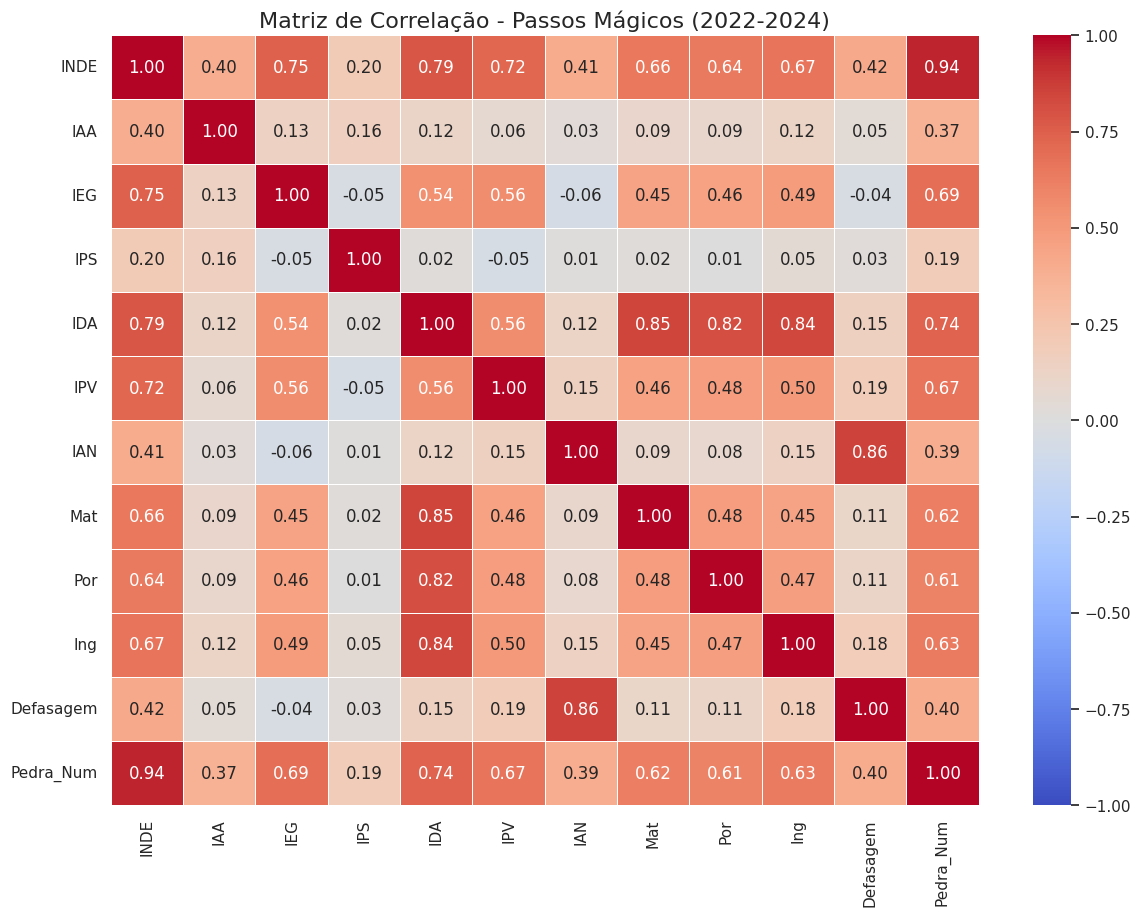

In [8]:
# Selecionar apenas colunas numéricas para correlação
cols_corr = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'Mat', 'Por', 'Ing', 'Defasagem', 'Pedra_Num']
df_corr = df_all[cols_corr].dropna(subset=['Defasagem']) # Removemos quem não tem a variável alvo

# Cálculo da matriz de correlação
correlation_matrix = df_corr.corr()

# Plot do Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Mostra os valores
    cmap='coolwarm',   # Cores: Vermelho (+) e Azul (-)
    fmt=".2f",         # 2 casas decimais
    linewidths=0.5,
    vmin=-1, vmax=1    # Escala de -1 a 1
)
plt.title('Matriz de Correlação - Passos Mágicos (2022-2024)', fontsize=16)
plt.show()

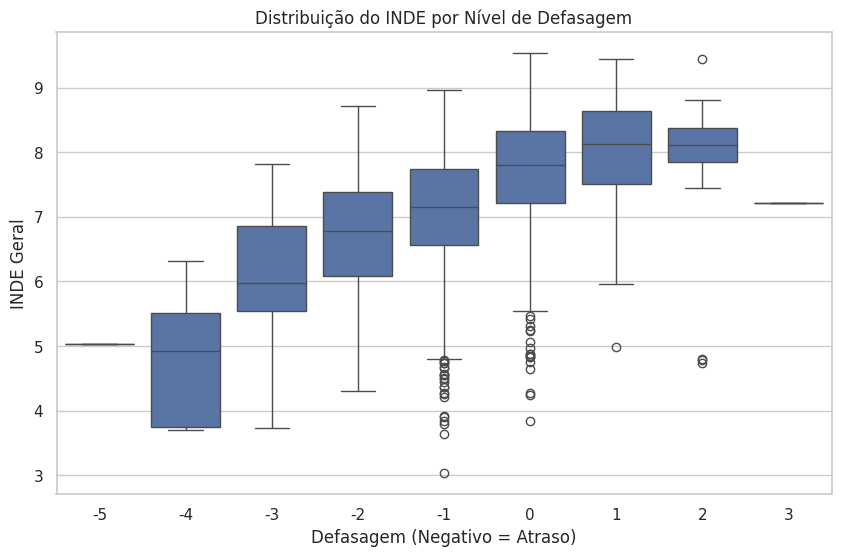

Correlação com a Defasagem:
Defasagem    1.000000
IAN          0.855942
INDE         0.415384
Pedra_Num    0.402304
IPV          0.189146
Ing          0.182472
IDA          0.151253
Por          0.113048
Mat          0.108559
IAA          0.045643
IPS          0.028444
IEG         -0.044559
Name: Defasagem, dtype: float64


In [9]:
# Visualizar correlação das notas com a Defasagem
# Nota: Defasagem negativa indica atraso escolar.
# Quanto maior a nota (Mat/Por), maior deveria ser a Defasagem (mais próximo de 0 ou positivo)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Defasagem', y='INDE', data=df_all)
plt.title('Distribuição do INDE por Nível de Defasagem')
plt.xlabel('Defasagem (Negativo = Atraso)')
plt.ylabel('INDE Geral')
plt.show()

# Ver correlação numérica específica com o alvo
print("Correlação com a Defasagem:")
print(correlation_matrix['Defasagem'].sort_values(ascending=False))